# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m = 1
A = 0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

Choose your grid

In [2]:
global loggrid=true
global bisection=false
global meshrefinement=false;

In [3]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [4]:
print(N)

400.0

In [5]:
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
global dir = "/home/rita13santos/Desktop/MSc Thesis new/gravitational-collapse/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis new/gravitational-collapse/ScalarField/DATA"

# Grid

In [6]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [7]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
end;

step size is  0.0025
the time step is 0.00125


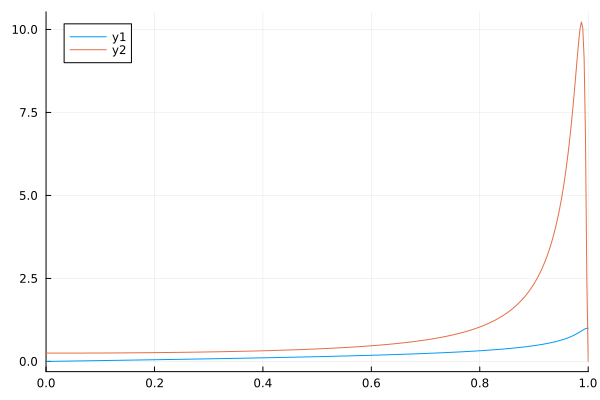

In [8]:
using Plots
plot([originalX[4:L-3] originalX[4:L-3]], [initX[4:L-3] analytic_jacobian(originalX[4:L-3])],xlim=[0,1])

In [9]:
#analytic_jacobian(originalX[4:L-3]);

# Initial data of m β Ψ and Ψ,x

In [10]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [11]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [12]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [13]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);

state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

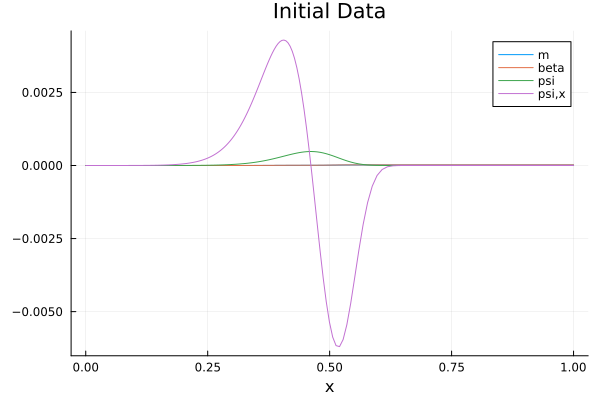

In [14]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

In [15]:
"""using TickTock
tick()
a=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5])#doublegrid(initX1)
tock()

tick()
f=Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
b=f(initX1)

#println(a.-b)
tock()

#plot(initX1, a.-init_gaussian_der(initX1,r0,sigma,A))
plot(doublegrid(initX1), a.-init_gaussian_der(doublegrid(initX1),r0,sigma,A))""";


In [16]:
state_array

407×5 Matrix{Float64}:
 -5.58441e-23  -2.03238e-20  -3.34785e-14   4.32742e-11   -0.0075
 -2.12342e-23  -7.45527e-21  -1.07603e-14   1.95588e-11   -0.005
 -4.88334e-24  -1.63815e-21  -1.86161e-15   4.96985e-12   -0.0025
  0.0           0.0           0.0           0.0            0.0
  2.07376e-25   3.31594e-22   1.60678e-15   5.14169e-12    0.000625002
  2.53034e-24   2.22904e-21   9.74104e-15   2.08874e-11    0.00125001
  1.37604e-23   8.56476e-21   3.11851e-14   4.77296e-11    0.00187505
  5.10745e-23   2.44594e-20   7.30354e-14   8.61766e-11    0.00250012
  1.48342e-22   5.75094e-20   1.42713e-13   1.36753e-10    0.00312523
  3.6339e-22    1.18078e-19   2.47977e-13   1.99999e-10    0.0037504
  7.86307e-22   2.19613e-19   3.96931e-13   2.76473e-10    0.00437564
  1.54888e-21   3.78983e-19   5.9804e-13    3.66751e-10    0.00500096
  2.83527e-21   6.16847e-19   8.60142e-13   4.71428e-10    0.00562636
  ⋮                                                       
  1.81315e-5    2.1237e-5   

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [17]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [18]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis new/gravitational-collapse/ScalarField/DATA/parameters.csv"

In [19]:
ginit=speed(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.5006270875775025


In [20]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [21]:
finaltime=1.3*3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 1 dt is 0.00125, t=0.00125 speed is 0.4993751934419167, dx/dt=2.0


iteration 2 dt is 0.00125, t=0.0025 speed is 0.4993751934419167, dx/dt=2.0


iteration 3 dt is 0.00125, t=0.00375 speed is 0.4993751934419167, dx/dt=2.0


iteration 4 dt is 0.00125, t=0.005 speed is 0.4993751934419167, dx/dt=2.0


iteration 5 dt is 0.00125, t=0.00625 speed is 0.4993751934419167, dx/dt=2.0


iteration 6 dt is 0.00125, t=0.007500000000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 7 dt is 0.00125, t=0.00875 speed is 0.4993751934419167, dx/dt=2.0


iteration 8 dt is 0.00125, t=0.01 speed is 0.4993751934419167, dx/dt=2.0


iteration 9 dt is 0.00125, t=0.01125 speed is 0.4993751934419167, dx/dt=2.0


iteration 10 dt is 0.00125, t=0.012499999999999999 speed is 0.4993751934419167, dx/dt=2.0


iteration 11 dt is 0.00125, t=0.013749999999999998 speed is 0.4993751934419167, dx/dt=2.0


iteration 12 dt is 0.00125, t=0.014999999999999998 speed is 0.4993751934419167, dx/dt=2.0


iteration 13 



iteration 108 dt is 0.00125, t=0.1350000000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 109 dt is 0.00125, t=0.1362500000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 110 dt is 0.00125, t=0.1375000000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 111 dt is 0.00125, t=0.1387500000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 112 dt is 0.00125, t=0.1400000000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 113 dt is 0.00125, t=0.1412500000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 114 dt is 0.00125, t=0.1425000000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 115 dt is 0.00125, t=0.1437500000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 116 dt is 0.00125, t=0.1450000000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 117 dt is 0.00125, t=0.1462500000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 118 dt is 0.00125, t=0.1475000000000001 speed is 0.4993751934419167, dx/dt=2.0



iteration 217 dt is 0.00125, t=0.2712499999999997 speed is 0.4993751934419167, dx/dt=2.0


iteration 218 dt is 0.00125, t=0.2724999999999997 speed is 0.4993751934419167, dx/dt=2.0


iteration 219 dt is 0.00125, t=0.27374999999999966 speed is 0.4993751934419167, dx/dt=2.0


iteration 220 dt is 0.00125, t=0.27499999999999963 speed is 0.4993751934419167, dx/dt=2.0


iteration 221 dt is 0.00125, t=0.2762499999999996 speed is 0.4993751934419167, dx/dt=2.0


iteration 222 dt is 0.00125, t=0.2774999999999996 speed is 0.4993751934419166, dx/dt=2.0


iteration 223 dt is 0.00125, t=0.27874999999999955 speed is 0.4993751934419166, dx/dt=2.0


iteration 224 dt is 0.00125, t=0.2799999999999995 speed is 0.4993751934419166, dx/dt=2.0


iteration 225 dt is 0.00125, t=0.2812499999999995 speed is 0.4993751934419166, dx/dt=2.0


iteration 226 dt is 0.00125, t=0.2824999999999995 speed is 0.4993751934419166, dx/dt=2.0


iteration 227 dt is 0.00125, t=0.28374999999999945 speed is 0.4993751934419166, dx/dt



iteration 316 dt is 0.00125, t=0.3949999999999971 speed is 0.4993751934419166, dx/dt=2.0


iteration 317 dt is 0.00125, t=0.39624999999999705 speed is 0.4993751934419166, dx/dt=2.0


iteration 318 dt is 0.00125, t=0.397499999999997 speed is 0.4993751934419166, dx/dt=2.0


iteration 319 dt is 0.00125, t=0.398749999999997 speed is 0.4993751934419166, dx/dt=2.0


iteration 320 dt is 0.00125, t=0.39999999999999697 speed is 0.4993751934419166, dx/dt=2.0


iteration 321 dt is 0.00125, t=0.40124999999999694 speed is 0.4993751934419166, dx/dt=2.0


iteration 322 dt is 0.00125, t=0.4024999999999969 speed is 0.4993751934419166, dx/dt=2.0


iteration 323 dt is 0.00125, t=0.4037499999999969 speed is 0.4993751934419166, dx/dt=2.0


iteration 324 dt is 0.00125, t=0.40499999999999686 speed is 0.4993751934419166, dx/dt=2.0


iteration 325 dt is 0.00125, t=0.40624999999999684 speed is 0.4993751934419166, dx/dt=2.0


iteration 326 dt is 0.00125, t=0.4074999999999968 speed is 0.4993751934419166, dx/dt=



iteration 419 dt is 0.00125, t=0.5237499999999944 speed is 0.49937519344191683, dx/dt=2.0


iteration 420 dt is 0.00125, t=0.5249999999999944 speed is 0.4993751934419167, dx/dt=2.0


iteration 421 dt is 0.00125, t=0.5262499999999943 speed is 0.4993751934419167, dx/dt=2.0


iteration 422 dt is 0.00125, t=0.5274999999999943 speed is 0.4993751934419167, dx/dt=2.0


iteration 423 dt is 0.00125, t=0.5287499999999943 speed is 0.4993751934419167, dx/dt=2.0


iteration 424 dt is 0.00125, t=0.5299999999999943 speed is 0.4993751934419167, dx/dt=2.0


iteration 425 dt is 0.00125, t=0.5312499999999942 speed is 0.49937519344191683, dx/dt=2.0


iteration 426 dt is 0.00125, t=0.5324999999999942 speed is 0.4993751934419167, dx/dt=2.0


iteration 427 dt is 0.00125, t=0.5337499999999942 speed is 0.4993751934419167, dx/dt=2.0


iteration 428 dt is 0.00125, t=0.5349999999999941 speed is 0.4993751934419167, dx/dt=2.0


iteration 429 dt is 0.00125, t=0.5362499999999941 speed is 0.4993751934419167, dx/dt=2



iteration 529 dt is 0.00125, t=0.6612499999999915 speed is 0.4993751934419167, dx/dt=2.0


iteration 530 dt is 0.00125, t=0.6624999999999914 speed is 0.4993751934419166, dx/dt=2.0


iteration 531 dt is 0.00125, t=0.6637499999999914 speed is 0.49937519344191683, dx/dt=2.0


iteration 532 dt is 0.00125, t=0.6649999999999914 speed is 0.4993751934419167, dx/dt=2.0


iteration 533 dt is 0.00125, t=0.6662499999999913 speed is 0.4993751934419167, dx/dt=2.0


iteration 534 dt is 0.00125, t=0.6674999999999913 speed is 0.4993751934419167, dx/dt=2.0


iteration 535 dt is 0.00125, t=0.6687499999999913 speed is 0.4993751934419167, dx/dt=2.0


iteration 536 dt is 0.00125, t=0.6699999999999913 speed is 0.4993751934419167, dx/dt=2.0


iteration 537 dt is 0.00125, t=0.6712499999999912 speed is 0.4993751934419166, dx/dt=2.0


iteration 538 dt is 0.00125, t=0.6724999999999912 speed is 0.4993751934419167, dx/dt=2.0


iteration 539 dt is 0.00125, t=0.6737499999999912 speed is 0.4993751934419167, dx/dt=2.



iteration 621 dt is 0.00125, t=0.776249999999989 speed is 0.4993751934419167, dx/dt=2.0


iteration 622 dt is 0.00125, t=0.777499999999989 speed is 0.4993751934419167, dx/dt=2.0


iteration 623 dt is 0.00125, t=0.778749999999989 speed is 0.4993751934419166, dx/dt=2.0


iteration 624 dt is 0.00125, t=0.7799999999999889 speed is 0.4993751934419167, dx/dt=2.0


iteration 625 dt is 0.00125, t=0.7812499999999889 speed is 0.4993751934419167, dx/dt=2.0


iteration 626 dt is 0.00125, t=0.7824999999999889 speed is 0.4993751934419167, dx/dt=2.0


iteration 627 dt is 0.00125, t=0.7837499999999888 speed is 0.4993751934419167, dx/dt=2.0


iteration 628 dt is 0.00125, t=0.7849999999999888 speed is 0.4993751934419167, dx/dt=2.0


iteration 629 dt is 0.00125, t=0.7862499999999888 speed is 0.4993751934419166, dx/dt=2.0


iteration 630 dt is 0.00125, t=0.7874999999999888 speed is 0.4993751934419166, dx/dt=2.0


iteration 631 dt is 0.00125, t=0.7887499999999887 speed is 0.4993751934419166, dx/dt=2.0






iteration 713 dt is 0.00125, t=0.8912499999999866 speed is 0.4993751934419167, dx/dt=2.0


iteration 714 dt is 0.00125, t=0.8924999999999865 speed is 0.4993751934419167, dx/dt=2.0


iteration 715 dt is 0.00125, t=0.8937499999999865 speed is 0.4993751934419167, dx/dt=2.0


iteration 716 dt is 0.00125, t=0.8949999999999865 speed is 0.4993751934419167, dx/dt=2.0


iteration 717 dt is 0.00125, t=0.8962499999999864 speed is 0.4993751934419166, dx/dt=2.0


iteration 718 dt is 0.00125, t=0.8974999999999864 speed is 0.4993751934419167, dx/dt=2.0


iteration 719 dt is 0.00125, t=0.8987499999999864 speed is 0.4993751934419166, dx/dt=2.0


iteration 720 dt is 0.00125, t=0.8999999999999864 speed is 0.4993751934419167, dx/dt=2.0


iteration 721 dt is 0.00125, t=0.9012499999999863 speed is 0.4993751934419166, dx/dt=2.0


iteration 722 dt is 0.00125, t=0.9024999999999863 speed is 0.4993751934419167, dx/dt=2.0


iteration 723 dt is 0.00125, t=0.9037499999999863 speed is 0.49937519344191683, dx/dt=2.



iteration 822 dt is 0.00125, t=1.0274999999999836 speed is 0.4993751934419167, dx/dt=2.0


iteration 823 dt is 0.00125, t=1.0287499999999836 speed is 0.4993751934419167, dx/dt=2.0


iteration 824 dt is 0.00125, t=1.0299999999999836 speed is 0.49937519344191683, dx/dt=2.0


iteration 825 dt is 0.00125, t=1.0312499999999836 speed is 0.4993751934419167, dx/dt=2.0


iteration 826 dt is 0.00125, t=1.0324999999999835 speed is 0.4993751934419167, dx/dt=2.0


iteration 827 dt is 0.00125, t=1.0337499999999835 speed is 0.4993751934419167, dx/dt=2.0


iteration 828 dt is 0.00125, t=1.0349999999999835 speed is 0.4993751934419167, dx/dt=2.0


iteration 829 dt is 0.00125, t=1.0362499999999835 speed is 0.4993751934419166, dx/dt=2.0


iteration 830 dt is 0.00125, t=1.0374999999999834 speed is 0.4993751934419167, dx/dt=2.0


iteration 831 dt is 0.00125, t=1.0387499999999834 speed is 0.4993751934419167, dx/dt=2.0


iteration 832 dt is 0.00125, t=1.0399999999999834 speed is 0.4993751934419167, dx/dt=2.



iteration 932 dt is 0.00125, t=1.1649999999999807 speed is 0.4993751934419167, dx/dt=2.0


iteration 933 dt is 0.00125, t=1.1662499999999807 speed is 0.4993751934419167, dx/dt=2.0


iteration 934 dt is 0.00125, t=1.1674999999999807 speed is 0.4993751934419167, dx/dt=2.0


iteration 935 dt is 0.00125, t=1.1687499999999806 speed is 0.4993751934419167, dx/dt=2.0


iteration 936 dt is 0.00125, t=1.1699999999999806 speed is 0.49937519344191683, dx/dt=2.0


iteration 937 dt is 0.00125, t=1.1712499999999806 speed is 0.49937519344191683, dx/dt=2.0


iteration 938 dt is 0.00125, t=1.1724999999999806 speed is 0.4993751934419167, dx/dt=2.0


iteration 939 dt is 0.00125, t=1.1737499999999805 speed is 0.4993751934419166, dx/dt=2.0


iteration 940 dt is 0.00125, t=1.1749999999999805 speed is 0.49937519344191683, dx/dt=2.0


iteration 941 dt is 0.00125, t=1.1762499999999805 speed is 0.4993751934419167, dx/dt=2.0


iteration 942 dt is 0.00125, t=1.1774999999999805 speed is 0.4993751934419167, dx/dt=



iteration 1030 dt is 0.00125, t=1.287499999999978 speed is 0.4993751934419167, dx/dt=2.0


iteration 1031 dt is 0.00125, t=1.288749999999978 speed is 0.4993751934419167, dx/dt=2.0


iteration 1032 dt is 0.00125, t=1.289999999999978 speed is 0.4993751934419167, dx/dt=2.0


iteration 1033 dt is 0.00125, t=1.291249999999978 speed is 0.4993751934419167, dx/dt=2.0


iteration 1034 dt is 0.00125, t=1.292499999999978 speed is 0.4993751934419166, dx/dt=2.0


iteration 1035 dt is 0.00125, t=1.293749999999978 speed is 0.4993751934419166, dx/dt=2.0


iteration 1036 dt is 0.00125, t=1.294999999999978 speed is 0.4993751934419167, dx/dt=2.0


iteration 1037 dt is 0.00125, t=1.296249999999978 speed is 0.4993751934419167, dx/dt=2.0


iteration 1038 dt is 0.00125, t=1.297499999999978 speed is 0.4993751934419166, dx/dt=2.0


iteration 1039 dt is 0.00125, t=1.2987499999999779 speed is 0.4993751934419167, dx/dt=2.0


iteration 1040 dt is 0.00125, t=1.2999999999999778 speed is 0.4993751934419167, dx/dt=2



iteration 1136 dt is 0.00125, t=1.4199999999999753 speed is 0.4993751934419167, dx/dt=2.0


iteration 1137 dt is 0.00125, t=1.4212499999999753 speed is 0.4993751934419166, dx/dt=2.0


iteration 1138 dt is 0.00125, t=1.4224999999999752 speed is 0.4993751934419167, dx/dt=2.0


iteration 1139 dt is 0.00125, t=1.4237499999999752 speed is 0.49937519344191683, dx/dt=2.0


iteration 1140 dt is 0.00125, t=1.4249999999999752 speed is 0.4993751934419167, dx/dt=2.0


iteration 1141 dt is 0.00125, t=1.4262499999999751 speed is 0.4993751934419167, dx/dt=2.0


iteration 1142 dt is 0.00125, t=1.4274999999999751 speed is 0.4993751934419167, dx/dt=2.0


iteration 1143 dt is 0.00125, t=1.428749999999975 speed is 0.4993751934419167, dx/dt=2.0


iteration 1144 dt is 0.00125, t=1.429999999999975 speed is 0.4993751934419167, dx/dt=2.0


iteration 1145 dt is 0.00125, t=1.431249999999975 speed is 0.4993751934419166, dx/dt=2.0


iteration 1146 dt is 0.00125, t=1.432499999999975 speed is 0.4993751934419167, d



iteration 1226 dt is 0.00125, t=1.5324999999999729 speed is 0.4993751934419167, dx/dt=2.0


iteration 1227 dt is 0.00125, t=1.5337499999999729 speed is 0.4993751934419167, dx/dt=2.0


iteration 1228 dt is 0.00125, t=1.5349999999999728 speed is 0.4993751934419167, dx/dt=2.0


iteration 1229 dt is 0.00125, t=1.5362499999999728 speed is 0.4993751934419166, dx/dt=2.0


iteration 1230 dt is 0.00125, t=1.5374999999999728 speed is 0.4993751934419167, dx/dt=2.0


iteration 1231 dt is 0.00125, t=1.5387499999999728 speed is 0.4993751934419167, dx/dt=2.0


iteration 1232 dt is 0.00125, t=1.5399999999999727 speed is 0.4993751934419166, dx/dt=2.0


iteration 1233 dt is 0.00125, t=1.5412499999999727 speed is 0.4993751934419166, dx/dt=2.0


iteration 1234 dt is 0.00125, t=1.5424999999999727 speed is 0.4993751934419167, dx/dt=2.0


iteration 1235 dt is 0.00125, t=1.5437499999999726 speed is 0.4993751934419166, dx/dt=2.0


iteration 1236 dt is 0.00125, t=1.5449999999999726 speed is 0.4993751934419167



iteration 1321 dt is 0.00125, t=1.6512499999999704 speed is 0.4993751934419167, dx/dt=2.0


iteration 1322 dt is 0.00125, t=1.6524999999999703 speed is 0.4993751934419166, dx/dt=2.0


iteration 1323 dt is 0.00125, t=1.6537499999999703 speed is 0.4993751934419167, dx/dt=2.0


iteration 1324 dt is 0.00125, t=1.6549999999999703 speed is 0.4993751934419167, dx/dt=2.0


iteration 1325 dt is 0.00125, t=1.6562499999999702 speed is 0.4993751934419166, dx/dt=2.0


iteration 1326 dt is 0.00125, t=1.6574999999999702 speed is 0.4993751934419167, dx/dt=2.0


iteration 1327 dt is 0.00125, t=1.6587499999999702 speed is 0.49937519344191683, dx/dt=2.0


iteration 1328 dt is 0.00125, t=1.6599999999999702 speed is 0.4993751934419167, dx/dt=2.0


iteration 1329 dt is 0.00125, t=1.6612499999999701 speed is 0.4993751934419167, dx/dt=2.0


iteration 1330 dt is 0.00125, t=1.6624999999999701 speed is 0.4993751934419166, dx/dt=2.0


iteration 1331 dt is 0.00125, t=1.66374999999997 speed is 0.4993751934419166,



iteration 1428 dt is 0.00125, t=1.7849999999999675 speed is 0.4993751934419167, dx/dt=2.0


iteration 1429 dt is 0.00125, t=1.7862499999999675 speed is 0.4993751934419167, dx/dt=2.0


iteration 1430 dt is 0.00125, t=1.7874999999999674 speed is 0.49937519344191683, dx/dt=2.0


iteration 1431 dt is 0.00125, t=1.7887499999999674 speed is 0.4993751934419167, dx/dt=2.0


iteration 1432 dt is 0.00125, t=1.7899999999999674 speed is 0.4993751934419167, dx/dt=2.0


iteration 1433 dt is 0.00125, t=1.7912499999999674 speed is 0.4993751934419167, dx/dt=2.0


iteration 1434 dt is 0.00125, t=1.7924999999999673 speed is 0.4993751934419167, dx/dt=2.0


iteration 1435 dt is 0.00125, t=1.7937499999999673 speed is 0.4993751934419166, dx/dt=2.0


iteration 1436 dt is 0.00125, t=1.7949999999999673 speed is 0.49937519344191683, dx/dt=2.0


iteration 1437 dt is 0.00125, t=1.7962499999999673 speed is 0.4993751934419167, dx/dt=2.0


iteration 1438 dt is 0.00125, t=1.7974999999999672 speed is 0.49937519344191



iteration 1523 dt is 0.00125, t=1.903749999999965 speed is 0.4993751934419167, dx/dt=2.0


iteration 1524 dt is 0.00125, t=1.904999999999965 speed is 0.4993751934419167, dx/dt=2.0


iteration 1525 dt is 0.00125, t=1.906249999999965 speed is 0.4993751934419167, dx/dt=2.0


iteration 1526 dt is 0.00125, t=1.907499999999965 speed is 0.4993751934419167, dx/dt=2.0


iteration 1527 dt is 0.00125, t=1.9087499999999649 speed is 0.4993751934419166, dx/dt=2.0


iteration 1528 dt is 0.00125, t=1.9099999999999648 speed is 0.4993751934419167, dx/dt=2.0


iteration 1529 dt is 0.00125, t=1.9112499999999648 speed is 0.4993751934419167, dx/dt=2.0


iteration 1530 dt is 0.00125, t=1.9124999999999648 speed is 0.4993751934419167, dx/dt=2.0


iteration 1531 dt is 0.00125, t=1.9137499999999648 speed is 0.4993751934419167, dx/dt=2.0


iteration 1532 dt is 0.00125, t=1.9149999999999647 speed is 0.4993751934419167, dx/dt=2.0


iteration 1533 dt is 0.00125, t=1.9162499999999647 speed is 0.4993751934419167, dx



iteration 1630 dt is 0.00125, t=2.0374999999999686 speed is 0.4993751934419167, dx/dt=2.0


iteration 1631 dt is 0.00125, t=2.0387499999999688 speed is 0.4993751934419167, dx/dt=2.0


iteration 1632 dt is 0.00125, t=2.039999999999969 speed is 0.49937519344191683, dx/dt=2.0


iteration 1633 dt is 0.00125, t=2.041249999999969 speed is 0.4993751934419167, dx/dt=2.0


iteration 1634 dt is 0.00125, t=2.0424999999999693 speed is 0.4993751934419167, dx/dt=2.0


iteration 1635 dt is 0.00125, t=2.0437499999999695 speed is 0.4993751934419167, dx/dt=2.0


iteration 1636 dt is 0.00125, t=2.0449999999999697 speed is 0.4993751934419167, dx/dt=2.0


iteration 1637 dt is 0.00125, t=2.04624999999997 speed is 0.4993751934419166, dx/dt=2.0


iteration 1638 dt is 0.00125, t=2.04749999999997 speed is 0.4993751934419166, dx/dt=2.0


iteration 1639 dt is 0.00125, t=2.0487499999999703 speed is 0.4993751934419167, dx/dt=2.0


iteration 1640 dt is 0.00125, t=2.0499999999999705 speed is 0.4993751934419166, dx/



iteration 1736 dt is 0.00125, t=2.1699999999999893 speed is 0.49937519344191683, dx/dt=2.0


iteration 1737 dt is 0.00125, t=2.1712499999999895 speed is 0.4993751934419167, dx/dt=2.0


iteration 1738 dt is 0.00125, t=2.1724999999999897 speed is 0.4993751934419167, dx/dt=2.0


iteration 1739 dt is 0.00125, t=2.17374999999999 speed is 0.4993751934419167, dx/dt=2.0


iteration 1740 dt is 0.00125, t=2.17499999999999 speed is 0.4993751934419167, dx/dt=2.0


iteration 1741 dt is 0.00125, t=2.1762499999999902 speed is 0.4993751934419167, dx/dt=2.0


iteration 1742 dt is 0.00125, t=2.1774999999999904 speed is 0.4993751934419167, dx/dt=2.0


iteration 1743 dt is 0.00125, t=2.1787499999999906 speed is 0.4993751934419167, dx/dt=2.0


iteration 1744 dt is 0.00125, t=2.179999999999991 speed is 0.4993751934419166, dx/dt=2.0


iteration 1745 dt is 0.00125, t=2.181249999999991 speed is 0.4993751934419167, dx/dt=2.0


iteration 1746 dt is 0.00125, t=2.1824999999999912 speed is 0.4993751934419167, dx/



iteration 1833 dt is 0.00125, t=2.2912500000000082 speed is 0.49937519344191683, dx/dt=2.0


iteration 1834 dt is 0.00125, t=2.2925000000000084 speed is 0.4993751934419167, dx/dt=2.0


iteration 1835 dt is 0.00125, t=2.2937500000000086 speed is 0.4993751934419167, dx/dt=2.0


iteration 1836 dt is 0.00125, t=2.295000000000009 speed is 0.4993751934419166, dx/dt=2.0


iteration 1837 dt is 0.00125, t=2.296250000000009 speed is 0.4993751934419167, dx/dt=2.0


iteration 1838 dt is 0.00125, t=2.297500000000009 speed is 0.4993751934419167, dx/dt=2.0


iteration 1839 dt is 0.00125, t=2.2987500000000094 speed is 0.4993751934419167, dx/dt=2.0


iteration 1840 dt is 0.00125, t=2.3000000000000096 speed is 0.4993751934419166, dx/dt=2.0


iteration 1841 dt is 0.00125, t=2.30125000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 1842 dt is 0.00125, t=2.30250000000001 speed is 0.4993751934419167, dx/dt=2.0


iteration 1843 dt is 0.00125, t=2.30375000000001 speed is 0.4993751934419167, dx/dt=



iteration 1943 dt is 0.00125, t=2.4287500000000297 speed is 0.4993751934419166, dx/dt=2.0


iteration 1944 dt is 0.00125, t=2.43000000000003 speed is 0.4993751934419166, dx/dt=2.0


iteration 1945 dt is 0.00125, t=2.43125000000003 speed is 0.4993751934419167, dx/dt=2.0


iteration 1946 dt is 0.00125, t=2.4325000000000303 speed is 0.4993751934419166, dx/dt=2.0


iteration 1947 dt is 0.00125, t=2.4337500000000305 speed is 0.4993751934419167, dx/dt=2.0


iteration 1948 dt is 0.00125, t=2.4350000000000307 speed is 0.4993751934419167, dx/dt=2.0


iteration 1949 dt is 0.00125, t=2.436250000000031 speed is 0.4993751934419166, dx/dt=2.0


iteration 1950 dt is 0.00125, t=2.437500000000031 speed is 0.4993751934419166, dx/dt=2.0


iteration 1951 dt is 0.00125, t=2.4387500000000313 speed is 0.4993751934419167, dx/dt=2.0


iteration 1952 dt is 0.00125, t=2.4400000000000315 speed is 0.4993751934419167, dx/dt=2.0


iteration 1953 dt is 0.00125, t=2.4412500000000317 speed is 0.4993751934419166, dx/d



iteration 2035 dt is 0.00125, t=2.5437500000000477 speed is 0.4993751934419167, dx/dt=2.0


iteration 2036 dt is 0.00125, t=2.545000000000048 speed is 0.4993751934419166, dx/dt=2.0


iteration 2037 dt is 0.00125, t=2.546250000000048 speed is 0.4993751934419166, dx/dt=2.0


iteration 2038 dt is 0.00125, t=2.5475000000000483 speed is 0.4993751934419166, dx/dt=2.0


iteration 2039 dt is 0.00125, t=2.5487500000000485 speed is 0.4993751934419166, dx/dt=2.0


iteration 2040 dt is 0.00125, t=2.5500000000000487 speed is 0.4993751934419166, dx/dt=2.0


iteration 2041 dt is 0.00125, t=2.551250000000049 speed is 0.49937519344191655, dx/dt=2.0


iteration 2042 dt is 0.00125, t=2.552500000000049 speed is 0.4993751934419166, dx/dt=2.0


iteration 2043 dt is 0.00125, t=2.5537500000000493 speed is 0.4993751934419166, dx/dt=2.0


iteration 2044 dt is 0.00125, t=2.5550000000000495 speed is 0.4993751934419167, dx/dt=2.0


iteration 2045 dt is 0.00125, t=2.5562500000000496 speed is 0.4993751934419167, d



iteration 2140 dt is 0.00125, t=2.675000000000068 speed is 0.49937519344191655, dx/dt=2.0


iteration 2141 dt is 0.00125, t=2.6762500000000684 speed is 0.4993751934419166, dx/dt=2.0


iteration 2142 dt is 0.00125, t=2.6775000000000686 speed is 0.4993751934419166, dx/dt=2.0


iteration 2143 dt is 0.00125, t=2.678750000000069 speed is 0.4993751934419166, dx/dt=2.0


iteration 2144 dt is 0.00125, t=2.680000000000069 speed is 0.49937519344191655, dx/dt=2.0


iteration 2145 dt is 0.00125, t=2.681250000000069 speed is 0.4993751934419166, dx/dt=2.0


iteration 2146 dt is 0.00125, t=2.6825000000000694 speed is 0.4993751934419166, dx/dt=2.0


iteration 2147 dt is 0.00125, t=2.6837500000000696 speed is 0.49937519344191655, dx/dt=2.0


iteration 2148 dt is 0.00125, t=2.6850000000000698 speed is 0.49937519344191655, dx/dt=2.0


iteration 2149 dt is 0.00125, t=2.68625000000007 speed is 0.49937519344191655, dx/dt=2.0


iteration 2150 dt is 0.00125, t=2.68750000000007 speed is 0.49937519344191655, 



iteration 2249 dt is 0.00125, t=2.8112500000000895 speed is 0.4993751934419167, dx/dt=2.0


iteration 2250 dt is 0.00125, t=2.8125000000000897 speed is 0.4993751934419166, dx/dt=2.0


iteration 2251 dt is 0.00125, t=2.81375000000009 speed is 0.49937519344191655, dx/dt=2.0


iteration 2252 dt is 0.00125, t=2.81500000000009 speed is 0.4993751934419166, dx/dt=2.0


iteration 2253 dt is 0.00125, t=2.8162500000000903 speed is 0.49937519344191655, dx/dt=2.0


iteration 2254 dt is 0.00125, t=2.8175000000000905 speed is 0.4993751934419166, dx/dt=2.0


iteration 2255 dt is 0.00125, t=2.8187500000000907 speed is 0.4993751934419166, dx/dt=2.0


iteration 2256 dt is 0.00125, t=2.820000000000091 speed is 0.4993751934419167, dx/dt=2.0


iteration 2257 dt is 0.00125, t=2.821250000000091 speed is 0.4993751934419167, dx/dt=2.0


iteration 2258 dt is 0.00125, t=2.8225000000000913 speed is 0.4993751934419166, dx/dt=2.0


iteration 2259 dt is 0.00125, t=2.8237500000000915 speed is 0.4993751934419166, dx



iteration 2341 dt is 0.00125, t=2.9262500000001075 speed is 0.4993751934419166, dx/dt=2.0


iteration 2342 dt is 0.00125, t=2.9275000000001077 speed is 0.4993751934419166, dx/dt=2.0


iteration 2343 dt is 0.00125, t=2.928750000000108 speed is 0.4993751934419167, dx/dt=2.0


iteration 2344 dt is 0.00125, t=2.930000000000108 speed is 0.4993751934419167, dx/dt=2.0


iteration 2345 dt is 0.00125, t=2.9312500000001083 speed is 0.4993751934419167, dx/dt=2.0


iteration 2346 dt is 0.00125, t=2.9325000000001085 speed is 0.49937519344191683, dx/dt=2.0


iteration 2347 dt is 0.00125, t=2.9337500000001087 speed is 0.4993751934419167, dx/dt=2.0


iteration 2348 dt is 0.00125, t=2.935000000000109 speed is 0.4993751934419167, dx/dt=2.0


iteration 2349 dt is 0.00125, t=2.936250000000109 speed is 0.49937519344191683, dx/dt=2.0


iteration 2350 dt is 0.00125, t=2.9375000000001092 speed is 0.4993751934419167, dx/dt=2.0


iteration 2351 dt is 0.00125, t=2.9387500000001094 speed is 0.4993751934419166, 



iteration 2432 dt is 0.00125, t=3.0400000000001253 speed is 0.49937519344191683, dx/dt=2.0


iteration 2433 dt is 0.00125, t=3.0412500000001255 speed is 0.49937519344191683, dx/dt=2.0


iteration 2434 dt is 0.00125, t=3.0425000000001257 speed is 0.4993751934419166, dx/dt=2.0


iteration 2435 dt is 0.00125, t=3.043750000000126 speed is 0.4993751934419167, dx/dt=2.0


iteration 2436 dt is 0.00125, t=3.045000000000126 speed is 0.4993751934419167, dx/dt=2.0


iteration 2437 dt is 0.00125, t=3.0462500000001262 speed is 0.4993751934419167, dx/dt=2.0


iteration 2438 dt is 0.00125, t=3.0475000000001264 speed is 0.4993751934419166, dx/dt=2.0


iteration 2439 dt is 0.00125, t=3.0487500000001266 speed is 0.4993751934419167, dx/dt=2.0


iteration 2440 dt is 0.00125, t=3.050000000000127 speed is 0.4993751934419167, dx/dt=2.0


iteration 2441 dt is 0.00125, t=3.051250000000127 speed is 0.4993751934419166, dx/dt=2.0


iteration 2442 dt is 0.00125, t=3.0525000000001272 speed is 0.49937519344191683,



iteration 2542 dt is 0.00125, t=3.1775000000001468 speed is 0.49937519344191383, dx/dt=2.0


iteration 2543 dt is 0.00125, t=3.178750000000147 speed is 0.49937519344191383, dx/dt=2.0


iteration 2544 dt is 0.00125, t=3.180000000000147 speed is 0.4993751934419138, dx/dt=2.0


iteration 2545 dt is 0.00125, t=3.1812500000001473 speed is 0.49937519344191367, dx/dt=2.0


iteration 2546 dt is 0.00125, t=3.1825000000001475 speed is 0.4993751934419136, dx/dt=2.0


iteration 2547 dt is 0.00125, t=3.1837500000001477 speed is 0.4993751934419135, dx/dt=2.0


iteration 2548 dt is 0.00125, t=3.185000000000148 speed is 0.49937519344191333, dx/dt=2.0


iteration 2549 dt is 0.00125, t=3.186250000000148 speed is 0.4993751934419133, dx/dt=2.0


iteration 2550 dt is 0.00125, t=3.1875000000001483 speed is 0.49937519344191317, dx/dt=2.0


iteration 2551 dt is 0.00125, t=3.1887500000001485 speed is 0.49937519344191306, dx/dt=2.0


iteration 2552 dt is 0.00125, t=3.1900000000001487 speed is 0.49937519344191



iteration 2632 dt is 0.00125, t=3.2900000000001643 speed is 0.4993751934418933, dx/dt=2.0


iteration 2633 dt is 0.00125, t=3.2912500000001645 speed is 0.49937519344189296, dx/dt=2.0


iteration 2634 dt is 0.00125, t=3.2925000000001647 speed is 0.4993751934418925, dx/dt=2.0


iteration 2635 dt is 0.00125, t=3.293750000000165 speed is 0.499375193441892, dx/dt=2.0


iteration 2636 dt is 0.00125, t=3.295000000000165 speed is 0.49937519344189174, dx/dt=2.0


iteration 2637 dt is 0.00125, t=3.2962500000001653 speed is 0.4993751934418914, dx/dt=2.0


iteration 2638 dt is 0.00125, t=3.2975000000001655 speed is 0.49937519344189096, dx/dt=2.0


iteration 2639 dt is 0.00125, t=3.2987500000001657 speed is 0.49937519344189063, dx/dt=2.0


iteration 2640 dt is 0.00125, t=3.300000000000166 speed is 0.49937519344189024, dx/dt=2.0


iteration 2641 dt is 0.00125, t=3.301250000000166 speed is 0.49937519344188985, dx/dt=2.0


iteration 2642 dt is 0.00125, t=3.3025000000001663 speed is 0.499375193441889



iteration 2730 dt is 0.00125, t=3.4125000000001835 speed is 0.49937519344186565, dx/dt=2.0


iteration 2731 dt is 0.00125, t=3.4137500000001837 speed is 0.49937519344186565, dx/dt=2.0


iteration 2732 dt is 0.00125, t=3.415000000000184 speed is 0.4993751934418657, dx/dt=2.0


iteration 2733 dt is 0.00125, t=3.416250000000184 speed is 0.4993751934418658, dx/dt=2.0


iteration 2734 dt is 0.00125, t=3.4175000000001843 speed is 0.4993751934418657, dx/dt=2.0


iteration 2735 dt is 0.00125, t=3.4187500000001845 speed is 0.4993751934418658, dx/dt=2.0


iteration 2736 dt is 0.00125, t=3.4200000000001847 speed is 0.499375193441866, dx/dt=2.0


iteration 2737 dt is 0.00125, t=3.421250000000185 speed is 0.4993751934418661, dx/dt=2.0


iteration 2738 dt is 0.00125, t=3.422500000000185 speed is 0.49937519344186626, dx/dt=2.0


iteration 2739 dt is 0.00125, t=3.4237500000001853 speed is 0.4993751934418664, dx/dt=2.0


iteration 2740 dt is 0.00125, t=3.4250000000001855 speed is 0.4993751934418665, 



iteration 2839 dt is 0.00125, t=3.548750000000205 speed is 0.499375193441907, dx/dt=2.0


iteration 2840 dt is 0.00125, t=3.550000000000205 speed is 0.49937519344190734, dx/dt=2.0


iteration 2841 dt is 0.00125, t=3.551250000000205 speed is 0.4993751934419076, dx/dt=2.0


iteration 2842 dt is 0.00125, t=3.5525000000002054 speed is 0.49937519344190806, dx/dt=2.0


iteration 2843 dt is 0.00125, t=3.5537500000002056 speed is 0.4993751934419084, dx/dt=2.0


iteration 2844 dt is 0.00125, t=3.5550000000002058 speed is 0.4993751934419087, dx/dt=2.0


iteration 2845 dt is 0.00125, t=3.556250000000206 speed is 0.4993751934419091, dx/dt=2.0


iteration 2846 dt is 0.00125, t=3.557500000000206 speed is 0.4993751934419093, dx/dt=2.0


iteration 2847 dt is 0.00125, t=3.5587500000002064 speed is 0.4993751934419096, dx/dt=2.0


iteration 2848 dt is 0.00125, t=3.5600000000002066 speed is 0.4993751934419099, dx/dt=2.0


iteration 2849 dt is 0.00125, t=3.5612500000002068 speed is 0.4993751934419102, dx



iteration 2934 dt is 0.00125, t=3.6675000000002234 speed is 0.49937519344191683, dx/dt=2.0


iteration 2935 dt is 0.00125, t=3.6687500000002236 speed is 0.4993751934419167, dx/dt=2.0


iteration 2936 dt is 0.00125, t=3.6700000000002237 speed is 0.4993751934419167, dx/dt=2.0


iteration 2937 dt is 0.00125, t=3.671250000000224 speed is 0.4993751934419166, dx/dt=2.0


iteration 2938 dt is 0.00125, t=3.672500000000224 speed is 0.4993751934419166, dx/dt=2.0


iteration 2939 dt is 0.00125, t=3.6737500000002243 speed is 0.4993751934419167, dx/dt=2.0


iteration 2940 dt is 0.00125, t=3.6750000000002245 speed is 0.4993751934419166, dx/dt=2.0


iteration 2941 dt is 0.00125, t=3.6762500000002247 speed is 0.4993751934419166, dx/dt=2.0


iteration 2942 dt is 0.00125, t=3.677500000000225 speed is 0.4993751934419167, dx/dt=2.0


iteration 2943 dt is 0.00125, t=3.678750000000225 speed is 0.4993751934419166, dx/dt=2.0


iteration 2944 dt is 0.00125, t=3.6800000000002253 speed is 0.4993751934419167, d



iteration 3026 dt is 0.00125, t=3.7825000000002413 speed is 0.4993751934419027, dx/dt=2.0


iteration 3027 dt is 0.00125, t=3.7837500000002415 speed is 0.49937519344190234, dx/dt=2.0


iteration 3028 dt is 0.00125, t=3.7850000000002417 speed is 0.49937519344190195, dx/dt=2.0


iteration 3029 dt is 0.00125, t=3.786250000000242 speed is 0.49937519344190157, dx/dt=2.0


iteration 3030 dt is 0.00125, t=3.787500000000242 speed is 0.4993751934419013, dx/dt=2.0


iteration 3031 dt is 0.00125, t=3.7887500000002423 speed is 0.49937519344190096, dx/dt=2.0


iteration 3032 dt is 0.00125, t=3.7900000000002425 speed is 0.4993751934419005, dx/dt=2.0


iteration 3033 dt is 0.00125, t=3.7912500000002427 speed is 0.4993751934419002, dx/dt=2.0


iteration 3034 dt is 0.00125, t=3.792500000000243 speed is 0.4993751934418998, dx/dt=2.0


iteration 3035 dt is 0.00125, t=3.793750000000243 speed is 0.4993751934418994, dx/dt=2.0


iteration 3036 dt is 0.00125, t=3.7950000000002433 speed is 0.4993751934418991

In [505]:
#print(T_interp);

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis new/gravitational-collapse/ScalarField/2D/N2000_A0.001.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis new/gravitational-collapse/ScalarField/2D/N2000_A0.001.gif")
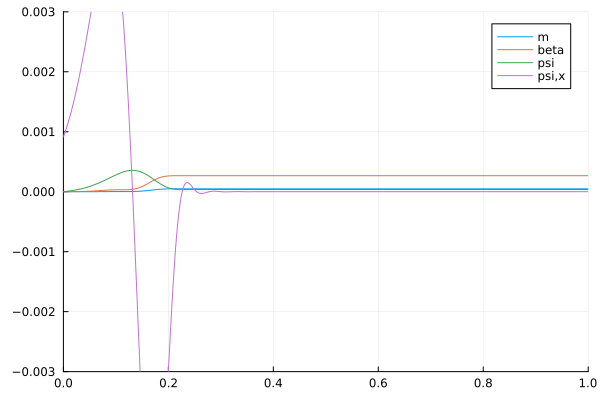

In [22]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1840:10:3120
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.003, 0.003],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif")
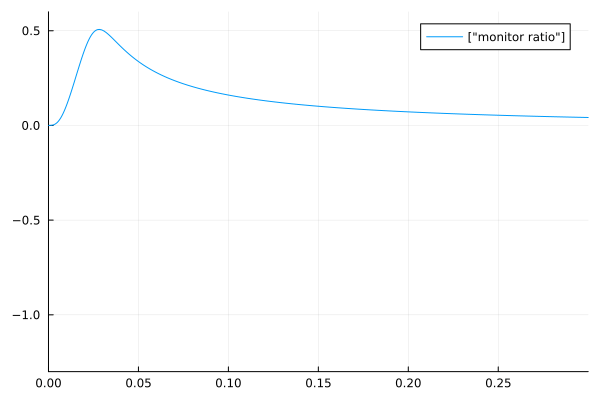

In [65]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

In [41]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
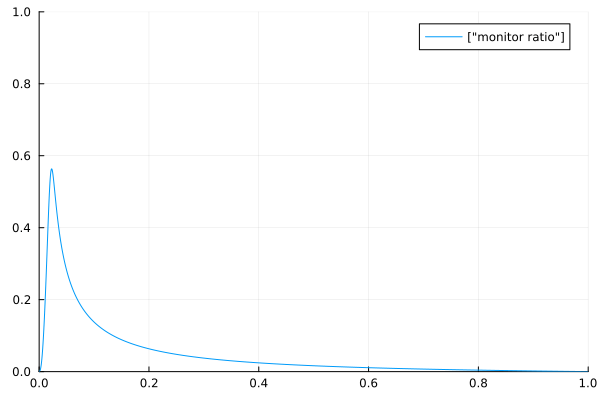

In [271]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

muninn animation

In [68]:
using Plots, CSV, DataFrames
import GR

lines = readlines(dir*"/res$res/data.txt")
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]

anim = @animate for n in 1:10
    
    for line in lines
        
    if occursin("Time", line)==true
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))

        end
    end



    #
    
    IJulia.clear_output(true)
    

    plot()
    
    
    plot!(grid[4:L-3], [m beta psi derpsi][4:L-3,:], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.001, 0.001],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1200)

LoadError: syntax: incomplete: "for" at In[68]:11 requires end

In [118]:
datagrid=Array{Float128}(undef, L)
datam=Array{Float128}(undef, L)
databeta=Array{Float128}(undef, L)
datapsi=Array{Float128}(undef, L)
dataderpsi=Array{Float128}(undef, L)

lines = readlines(dir*"/res$res/data.txt")

for line in lines
    if occursin("Time", line)==true
        plot(grid, m)
        
        
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
        
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))
        elseif a==[]
            #println(length(datagrid))
            #println(length(grid))
            #datagrid=cat(dims=2,datagrid, grid)
            datagrid=[datagrid; grid]
            datam=cat(dims=2,datam, m)
            databeta=cat(dims=2,databeta, beta)
            datapsi=cat(dims=2,datapsi, psi)
            dataderpsi=cat(dims=2,dataderpsi, derpsi)
        end
    end
    
end


In [119]:
datagrid

5796-element Vector{Any}:
    8.34319962899321883561303658422435691e-4956
    2.05206491026800433201677921073574507e-4936
 -nan
    8.34319963676342897893866671733368366e-4956
    1.53904868514964416335782103718351843e-4936
    2.77150719072578205953599890496588243e-4938
    1.19445898260724901253333516414690294e-4946
    1.53904868634410314596507031525083490e-4936
    2.77150776406609371101565222808974947e-4938
 -nan
    1.53904868753856212857231959331815136e-4936
    2.77150833740640536249530555121361651e-4938
    8.34319965554143682530893953901455664e-4956
    ⋮
    0.96
    0.965
    0.97
    0.975
    0.98
    0.985
    0.99
    0.995
    1.0
    1.005
    1.01
    1.015

In [117]:
A = Matrix{Int}(undef, 0, 2)  # 0x2 array of Int
B = rand(5, 2)
A = [A; B] 

5×2 Matrix{Float64}:
 0.12618    0.261235
 0.238235   0.840988
 0.200322   0.354143
 0.347195   0.854355
 0.0130686  0.727983

In [21]:
parse(Float64,"1")

1.0

In [47]:
dir*"/res$res/data.txt"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/data.txt"

In [ ]:
with open(dir) as f:
    for line in f:

        index = line.find("Time")
        if index==1:
            time.append(line[index+7:len(line)-1])
            auxgrid=[]
            auxm=[]
            auxbeta=[]
            auxpsi=[]
            auxderpsi=[]

        else:
                a=line.split()
                if a!=[]:
                    auxgrid.append(float(a[0]))
                    auxm.append(float(a[1]))
                    auxbeta.append(float(a[2]))
                    auxpsi.append(float(a[3]))
                    auxderpsi.append(float(a[4]))
                elif a==[]:
                    grid.append(auxgrid)
                    m.append(auxm)
                    beta.append(auxbeta)
                    psi.append(auxpsi)
                    derpsi.append(auxderpsi)
        datatime.append(time)
        datagrid.append(grid)
        datam.append(m)
        databeta.append(beta)
        datapsi.append(psi)
        dataderpsi.append(derpsi)

In [59]:
a=[ "ola tudo bem"]
split(a," ")

LoadError: MethodError: no method matching split(::Vector{String}, ::String)
[0mClosest candidates are:
[0m  split([91m::T[39m, ::Any; limit, keepempty) where T<:AbstractString at strings/util.jl:592

In [62]:
using DelimitedFiles

readdlm(dir*"/res$res/data.txt", ',',Int)

LoadError: unexpected character 'T' after quoted field at row 1 column 1

In [360]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [361]:
twod_epsilon(dt,dx)

3.12500000000000000000000000000000000e-02

In [363]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [147]:
twod_epsilon(dt,dx)

0.3125